In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install japanize-matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import japanize_matplotlib
import os

In [4]:
current_dir=os.getcwd()
current_dir

'/content'

In [5]:
os.listdir(current_dir)

['.config', 'drive', 'sample_data']

In [6]:
cd /content/drive/MyDrive/input/

/content/drive/MyDrive/input


In [7]:
ls

holidays_events.csv    store_sales_RNN_results.csv/  train_df1.csv
oil.csv                store_sales_RNN_results.h5    transactions.csv
sample_submission.csv  stores.csv
store_sales.csv        train.csv


In [8]:
holidays=pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")
stores = pd.read_csv("stores.csv")
transactions = pd.read_csv("transactions.csv")
train = pd.read_csv("train.csv")

In [9]:
#各項目の中身

In [10]:
print('holidays:{0}'.format(holidays.columns))
print('oil:{0}'.format(oil.columns))
print('stores:{0}'.format(stores.columns))
print('trabsactions:{0}'.format(transactions.columns))
print('train:{0}'.format(train.columns))

holidays:Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
oil:Index(['date', 'dcoilwtico'], dtype='object')
stores:Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')
trabsactions:Index(['date', 'store_nbr', 'transactions'], dtype='object')
train:Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')


In [11]:
#マージ
train_oil=train.merge(oil,how='left',on='date')
train_oil_holidays=train_oil.merge(holidays,how='left',on='date')
train_oil_holidays_transactions=train_oil_holidays.merge(transactions,how='left',on=['date','store_nbr'])
train_oil_holidays_transactions_stores=train_oil_holidays_transactions.merge(stores,how='left',on=['type','store_nbr']).sort_values(by=['date']).reset_index(drop=True)

In [12]:
#マージしたものをtrainとする
train=train_oil_holidays_transactions.copy()

In [13]:
#dateの項目から、Day,Week,Month,Year,Weekdayの項目を追加
train['date'] = pd.to_datetime(train['date'])
#df[date]object     ->      datetime
print(train['date'].dtypes)
#項目追加
train['Day'] = train['date'].dt.day
train['Week'] = train['date'].dt.week
train['Month'] = train['date'].dt.month
train['Year'] = train['date'].dt.year
train['Weekday']=train['date'].dt.weekday
train['quarter'] = train['date'].dt.quarter

#Dayは外してもいいかも

datetime64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [14]:
pd.DataFrame(train.dtypes, columns=['Type']).T

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred,transactions,Day,Week,Month,Year,Weekday,quarter
Type,int64,datetime64[ns],int64,object,float64,int64,float64,object,object,object,object,object,float64,int64,int64,int64,int64,int64,int64


In [15]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred,transactions,Day,Week,Month,Year,Weekday,quarter
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1


In [16]:
a=train['type'].unique()
b=train['locale'].unique()
c=train['family'].unique()
d=train['description'].unique()
e=train['transferred'].unique()
f=train['locale_name'].unique()

print('type:{0}'.format(a))
print("\n")
print('locale:{0}'.format(b))
print("\n")
print('family:{0}'.format(c))
print("\n")
print('description:{0}'.format(d))
print("\n")
print('transferred:{0}'.format(e))
print("\n")
print('type:{0}'.format(f))


type:['Holiday' nan 'Work Day' 'Additional' 'Event' 'Transfer' 'Bridge']


locale:['National' nan 'Local' 'Regional']


family:['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


description:['Primer dia del ano' nan 'Recupero puente Navidad'
 'Recupero puente primer dia del ano' 'Carnaval' 'Fundacion de Manta'
 'Provincializacion de Cotopaxi' 'Fundacion de Cuenca'
 'Cantonizacion de Libertad' 'Cantonizacion de Riobamba' 'Viernes Santo'
 'Dia del Trabajo' 'Dia de la Madre-1' 'Cantonizacion del Puyo'
 'Dia de la Madre' 'Batalla de Pichincha' 'Cantonizacion de Guaranda'
 'Provinciali

In [17]:
#四分位数と外れ値のindex値を取得する関数を定義

def box_Outlier(input_df):
  #入力のコピーを作成
  output_df=input_df.copy()
  #詳細を表示するデータの列を指定
  num_list=["onpromotion","dcoilwtico","store_nbr"]
  #指定した列分繰り返す
  for i in range(len(num_list)):
    #第1四分位数を取得
    q1=output_df[num_list[i]].quantile(0.25)
    #第2四分位数を取得
    q3=output_df[num_list[i]].quantile(0.75)
    #IQRを取得
    iqr=q3-q1
    #外れ値基準の下限を取得
    bottom=q1-(1.5*iqr)
    #外れ値基準の上限を取得
    up=q3+(1.5*iqr)
    #列名、Q1、Q3、IQR、外れ値を表示
    print(str(num_list[i]))
    print("Q1は："+str(q1))
    print("Q3は："+str(q3))
    print("IQRは："+str(iqr))
    print("外れ値は↓")
    print(output_df[num_list[i]][(output_df[num_list[i]] < bottom) | (output_df[num_list[i]] > up) ])
    print("*********************")
  return output_df

In [18]:
#箱ひげ図の詳細を取得
box_Outlier=box_Outlier(train)
box_Outlier

onpromotion
Q1は：0.0
Q3は：0.0
IQRは：0.0
外れ値は↓
819694       3
819699       5
821481       3
821497       1
823256       1
          ... 
3054337      2
3054340     11
3054344      1
3054345    148
3054346      8
Name: onpromotion, Length: 625820, dtype: int64
*********************
dcoilwtico
Q1は：46.41
Q3は：95.81
IQRは：49.400000000000006
外れ値は↓
Series([], Name: dcoilwtico, dtype: float64)
*********************
store_nbr
Q1は：14.0
Q3は：41.0
IQRは：27.0
外れ値は↓
Series([], Name: store_nbr, dtype: int64)
*********************


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred,transactions,Day,Week,Month,Year,Weekday,quarter
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,15,33,8,2017,1,3
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,15,33,8,2017,1,3
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,15,33,8,2017,1,3
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,15,33,8,2017,1,3


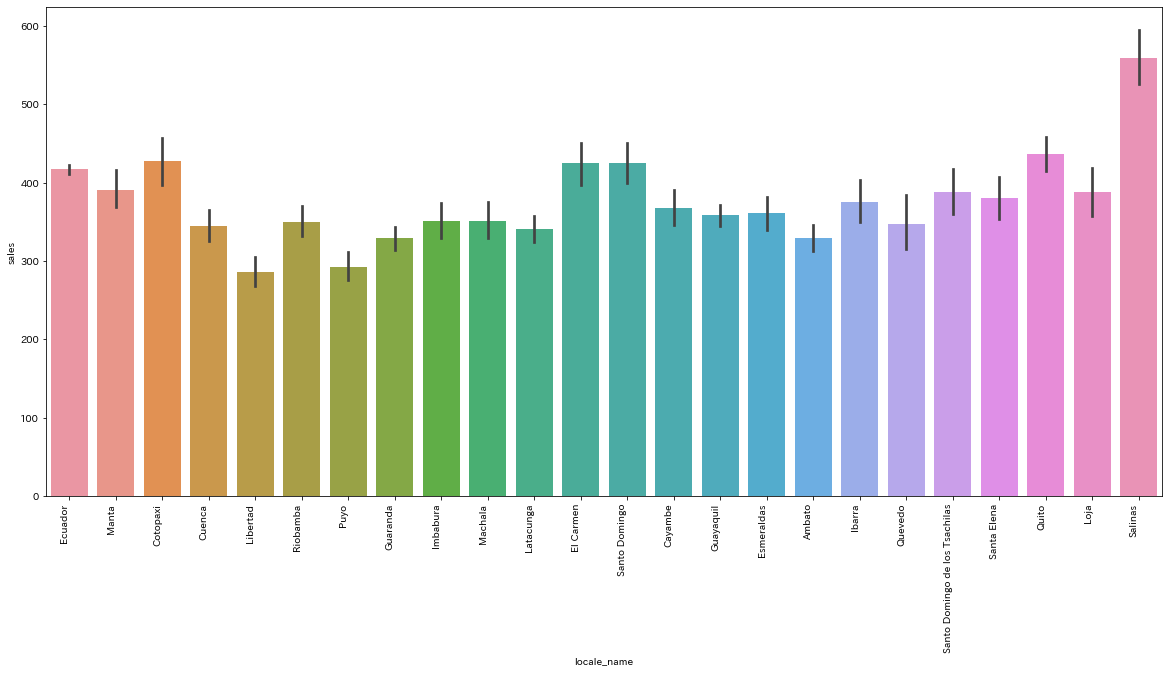

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
xlabels = ['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Latacunga', 'Machala', 'Imbabura', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas','Guayaquil']
ax.set_xticklabels(xlabels)
fig.autofmt_xdate(rotation=90)
sns.barplot(x='locale_name', y='sales', data=train)

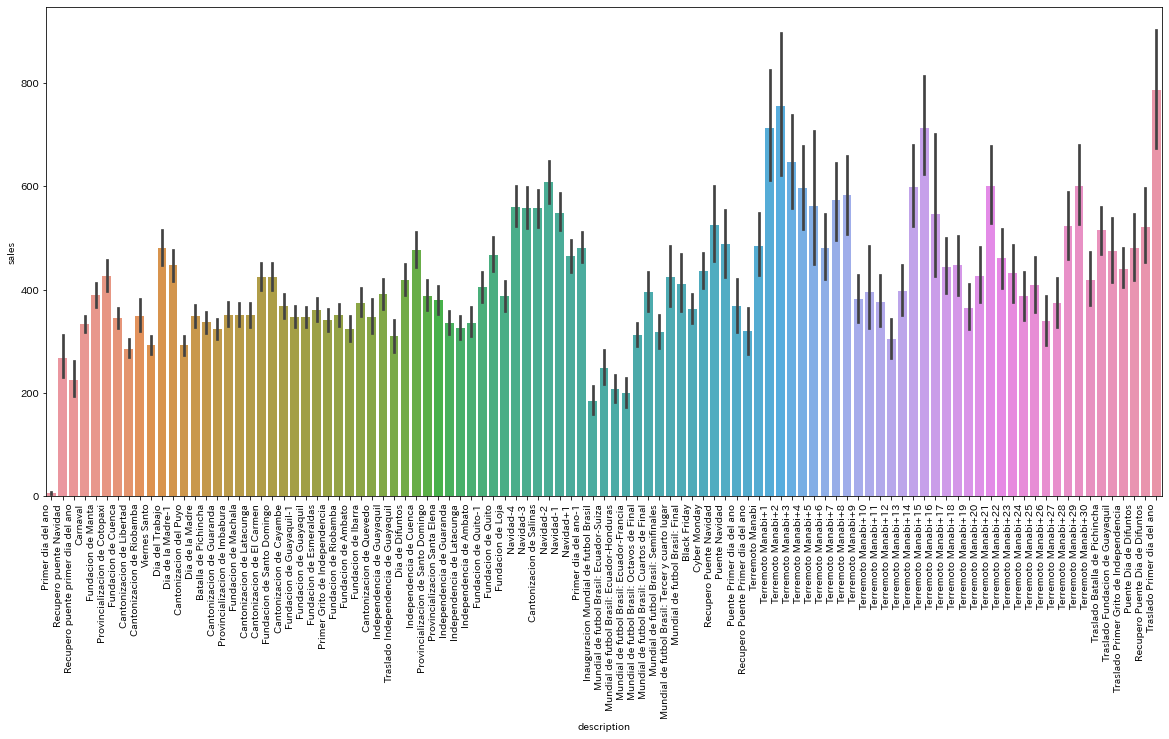

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
xlabels = ['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Cantonizacion de Latacunga',
       'Fundacion de Machala', 'Provincializacion de Imbabura',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizacion de Salinas', 'Navidad-3', 'Navidad-2',
       'Puente Navidad', 'Navidad-1', 'Navidad', 'Navidad+1',
       'Puente Primer dia del ano', 'Primer dia del ano-1',
       'Primer dia del ano','Recupero puente Navidad',
       'Recupero puente primer dia del ano', 'Carnaval', 'Viernes Santo',
       'Dia del Trabajo', 'Dia de la Madre-1', 'Dia de la Madre',
       'Batalla de Pichincha', 'Fundacion de Guayaquil-1',
       'Fundacion de Guayaquil', 'Inauguracion Mundial de futbol Brasil',
       'Mundial de futbol Brasil: Ecuador-Suiza',
       'Mundial de futbol Brasil: Ecuador-Honduras',
       'Mundial de futbol Brasil: Ecuador-Francia',
       'Mundial de futbol Brasil: Octavos de Final',
       'Mundial de futbol Brasil: Cuartos de Final',
       'Mundial de futbol Brasil: Semifinales',
       'Mundial de futbol Brasil: Tercer y cuarto lugar',
       'Mundial de futbol Brasil: Final', 'Black Friday', 'Cyber Monday',
       'Recupero Puente Navidad', 'Recupero Puente Primer dia del ano',
       'Terremoto Manabi', 'Terremoto Manabi+1', 'Terremoto Manabi+2',
       'Terremoto Manabi+3', 'Terremoto Manabi+4', 'Terremoto Manabi+5',
       'Terremoto Manabi+6', 'Terremoto Manabi+7', 'Terremoto Manabi+8',
       'Terremoto Manabi+9', 'Terremoto Manabi+10', 'Terremoto Manabi+11',
       'Terremoto Manabi+12', 'Terremoto Manabi+13',
       'Terremoto Manabi+14', 'Terremoto Manabi+15',
       'Terremoto Manabi+16', 'Terremoto Manabi+17',
       'Terremoto Manabi+18', 'Terremoto Manabi+19',
       'Terremoto Manabi+20', 'Terremoto Manabi+21',
       'Terremoto Manabi+22', 'Terremoto Manabi+23',
       'Terremoto Manabi+24', 'Terremoto Manabi+25',
       'Terremoto Manabi+26', 'Terremoto Manabi+27',
       'Terremoto Manabi+28', 'Terremoto Manabi+29',
       'Terremoto Manabi+30', 'Traslado Batalla de Pichincha',
       'Traslado Fundacion de Guayaquil',
       'Traslado Primer Grito de Independencia', 'Puente Dia de Difuntos',
       'Recupero Puente Dia de Difuntos', 'Traslado Primer dia del ano',
       'Traslado Fundacion de Quito']
ax.set_xticklabels(xlabels)
fig.autofmt_xdate(rotation=90)
sns.barplot(x='description', y='sales', data=train)

In [21]:
#oil price
train['dcoilwtico'].unique()


array([   nan,  93.14,  92.97,  93.12,  93.2 ,  93.21,  93.08,  93.81,
        93.6 ,  94.27,  93.26,  94.28,  95.49,  95.61,  96.09,  95.06,
        95.35,  95.15,  95.95,  97.62,  97.98,  97.65,  97.46,  96.21,
        96.68,  96.44,  95.84,  95.71,  97.01,  97.48,  97.03,  97.3 ,
        96.69,  94.92,  92.79,  92.74,  92.63,  92.84,  92.03,  90.71,
        90.13,  90.88,  90.47,  91.53,  92.01,  92.07,  92.44,  92.47,
        93.03,  93.49,  93.71,  92.46,  93.41,  94.55,  95.99,  96.53,
        97.24,  97.1 ,  97.23,  95.02,  92.76,  93.36,  94.18,  94.59,
        93.44,  91.23,  88.75,  88.73,  86.65,  87.83,  88.04,  88.81,
        89.21,  91.07,  93.27,  94.09,  93.22,  90.74,  93.7 ,  95.25,
        95.8 ,  95.28,  96.24,  95.81,  94.76,  93.96,  93.95,  94.85,
        95.72,  96.29,  95.55,  93.98,  94.12,  93.84,  94.65,  93.13,
        93.57,  91.93,  93.66,  94.71,  96.11,  95.82,  95.5 ,  95.98,
        96.66,  97.83,  97.86,  98.46,  98.24,  94.89,  95.07,  95.47,
      

In [22]:
#商品が販売されている店舗
train['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [23]:
#特定の日に店舗で宣伝されていた製品ファミリーのアイテムの総数
train['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [24]:
train['locale_name'].unique()

array(['Ecuador', nan, 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad',
       'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga',
       'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas',
       'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas'], dtype=object)

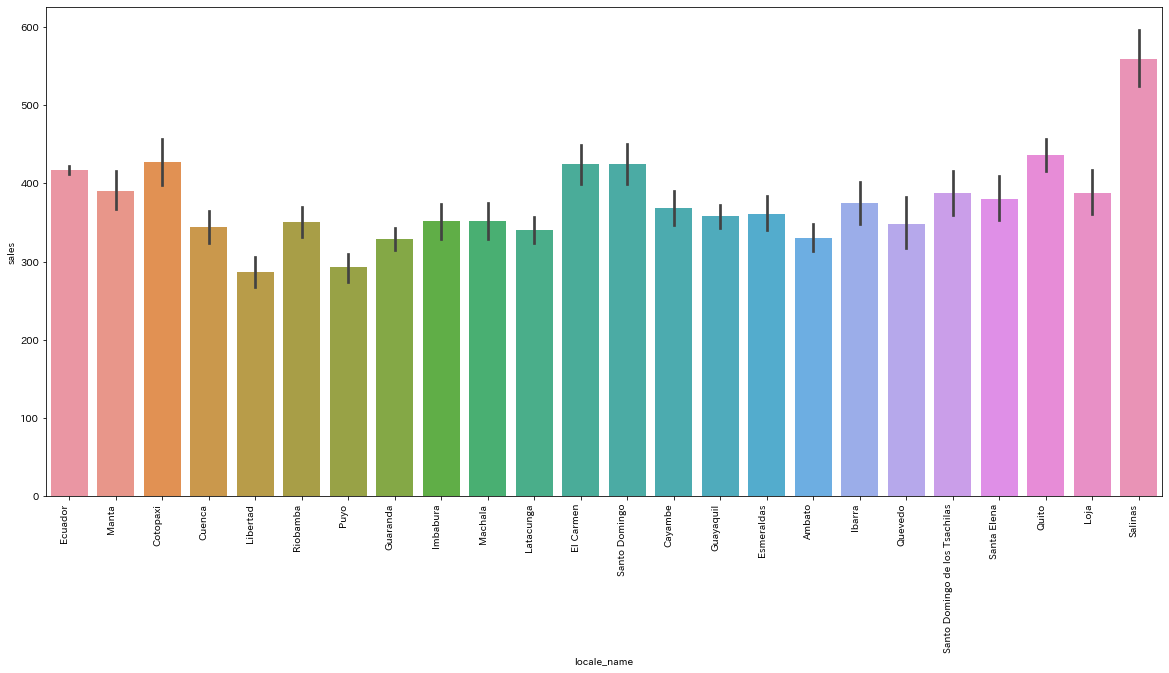

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
xlabels = ['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen']
ax.set_xticklabels(xlabels)
fig.autofmt_xdate(rotation=90)
sns.barplot(x='locale_name', y='sales', data=train)

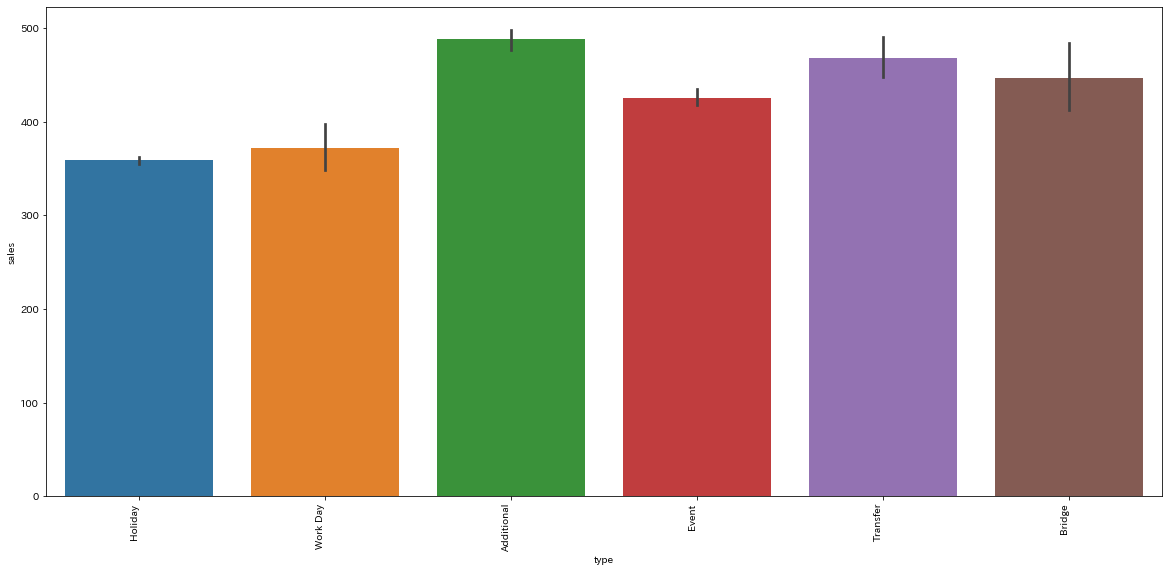

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
xlabels = ['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day',
       'Event']
ax.set_xticklabels(xlabels)
fig.autofmt_xdate(rotation=90)
sns.barplot(x='type', y='sales', data=train)

Text(0.5, 1.0, 'locale別売上')

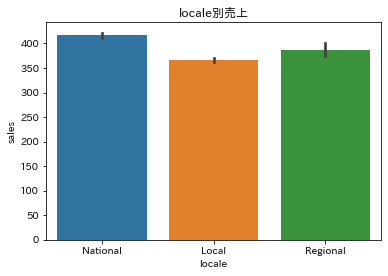

In [27]:
p=sns.barplot(x='locale', y='sales', data=train)
p.set_title("locale別売上")

In [28]:
b=round(len(train[train['type']=='Holiday'][train['locale']=='Local'])/len(train[train['type']=='Holiday'])*100,1)
print("HolidayのLocal割合{0}%".format(b))
# df.query("region==1").describe()
train[train['type']=='Holiday'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


HolidayのLocal割合62.0%


,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,Day,Week,Month,Year,Weekday,quarter
count,3.047220e+05,304722.00000,304722.000000,304722.000000,201366.000000,273504.000000,304722.000000,304722.000000,304722.000000,304722.000000,304722.000000,304722.000000
mean,1.529346e+06,27.50000,358.433812,2.691023,68.544779,1694.734435,12.824561,28.918129,6.994152,2014.824561,2.859649,2.690058
std,8.580428e+05,15.58581,1153.161110,12.246435,25.752932,986.219833,8.928822,13.421845,3.114764,1.334950,2.050009,1.010395
min,0.000000e+00,1.00000,0.000000,0.000000,27.960000,346.000000,1.000000,1.000000,1.000000,2013.000000,0.000000,1.000000
25%,8.299662e+05,14.00000,0.000000,0.000000,46.290000,1030.000000,5.000000,17.000000,4.000000,2014.000000,1.000000,2.000000
50%,1.553012e+06,27.50000,10.000000,0.000000,55.250000,1386.000000,11.000000,27.000000,7.000000,2015.000000,3.000000,3.000000
75%,2.274054e+06,41.00000,189.000000,0.000000,97.010000,2071.000000,23.000000,41.000000,10.000000,2016.000000,5.000000,4.000000
max,3.000887e+06,54.00000,89576.360000,718.000000,107.430000,7524.000000,29.000000,53.000000,12.000000,2017.000000,6.000000,4.000000


In [29]:
b=round(len(train[train['type']=='Bridge'][train['family']=='GROCERY I'])/len(train[train['type']=='Bridge'])*100,1)
print("GROCERY I割合{0}%".format(b))
# df.query("region==1").describe()
train[train['type']=='Bridge'].describe()

GROCERY I割合3.0%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,Day,Week,Month,Year,Weekday,quarter
count,5.346000e+03,5346.000000,5346.000000,5346.000000,5346.000000,4884.000000,5346.000000,5346.000000,5346.000000,5346.000000,5346.0,5346.000000
mean,1.694384e+06,27.500000,446.750854,5.310325,50.460000,1968.452703,10.666667,32.333333,8.000000,2015.000000,4.0,3.000000
std,5.666850e+05,15.587242,1309.716490,14.359400,4.582881,1205.290692,10.874021,22.397531,4.967019,0.816573,0.0,1.414346
min,1.286604e+06,1.000000,0.000000,0.000000,44.070000,531.000000,2.000000,1.000000,1.000000,2014.000000,4.0,1.000000
25%,1.287940e+06,14.000000,0.000000,0.000000,44.070000,1150.500000,2.000000,1.000000,1.000000,2014.000000,4.0,1.000000
50%,1.299968e+06,27.500000,16.000000,0.000000,52.720000,1533.500000,4.000000,44.000000,11.000000,2015.000000,4.0,4.000000
75%,2.495245e+06,41.000000,273.935000,2.000000,54.590000,2423.750000,26.000000,52.000000,12.000000,2016.000000,4.0,4.000000
max,2.496581e+06,54.000000,21367.000000,139.000000,54.590000,5693.000000,26.000000,52.000000,12.000000,2016.000000,4.0,4.000000


In [30]:
train['family']

0                          AUTOMOTIVE
1                           BABY CARE
2                              BEAUTY
3                           BEVERAGES
4                               BOOKS
                      ...            
3054343                       POULTRY
3054344                PREPARED FOODS
3054345                       PRODUCE
3054346    SCHOOL AND OFFICE SUPPLIES
3054347                       SEAFOOD
Name: family, Length: 3054348, dtype: object

In [31]:
train['type'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [32]:
print(train['date'].dtypes)

datetime64[ns]


In [33]:
train['date'] = pd.to_datetime(train['date'])

In [34]:
#df[date]object     ->      datetime
print(train['date'].dtypes)

datetime64[ns]


In [35]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred,transactions,Day,Week,Month,Year,Weekday,quarter
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,1,1,2013,1,1


In [36]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'type', 'locale', 'locale_name', 'description',
       'transferred', 'transactions', 'Day', 'Week', 'Month', 'Year',
       'Weekday', 'quarter'],
      dtype='object')

Text(0.5, 1.0, '年度別売上')

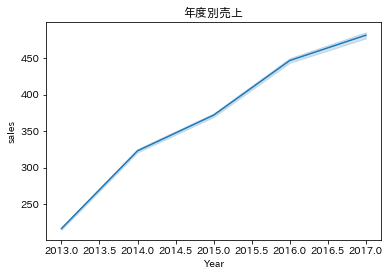

In [37]:
p=sns.lineplot(x='Year', y='sales', data=train)
p.set_title("年度別売上")

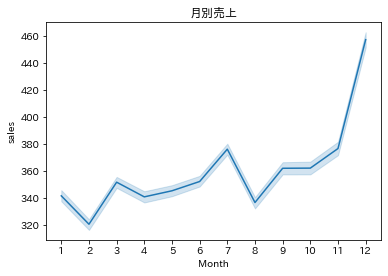

In [38]:
p=sns.lineplot(x='Month', y='sales', data=train)
p.set_title("月別売上")

# 目盛り調整のticker追加
import matplotlib.ticker as ticker
# axesを取得
ax = plt.gca()
# x軸(xaxis)に対して、1ごと目盛りを入れる
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
 
# グラフ表示
plt.show()

Text(0.5, 1.0, '曜日別売上')

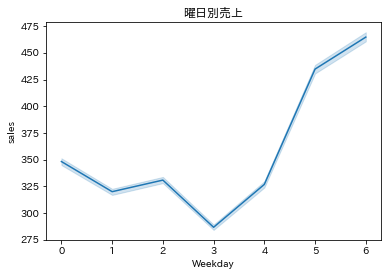

In [39]:
#月曜日を表す0から、日曜日を表す6
p=sns.lineplot(x='Weekday', y='sales', data=train)
p.set_title("曜日別売上")

In [40]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

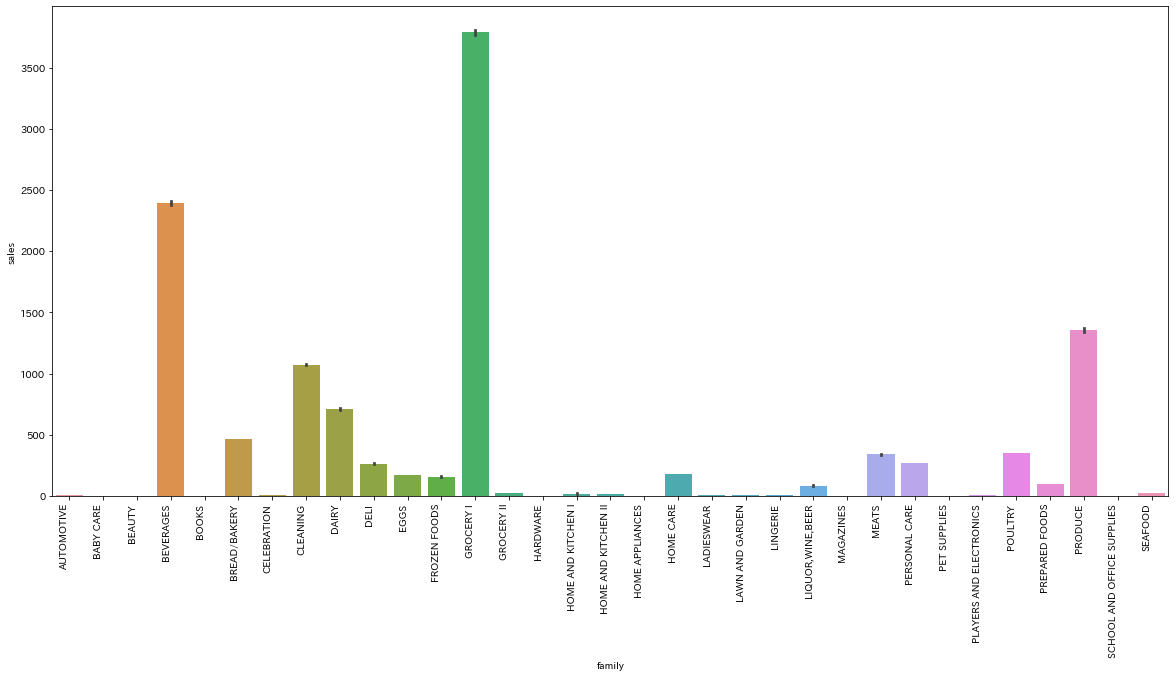

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
xlabels = ['HOME AND KITCHEN I', 'GROCERY II', 'GROCERY I',
       'HOME APPLIANCES', 'FROZEN FOODS', 'EGGS', 'HOME AND KITCHEN II',
       'HARDWARE', 'BREAD/BAKERY', 'LADIESWEAR', 'DAIRY', 'CLEANING',
       'CELEBRATION', 'BOOKS', 'BEVERAGES', 'BEAUTY', 'BABY CARE',
       'HOME CARE', 'AUTOMOTIVE', 'PET SUPPLIES', 'PERSONAL CARE',
       'MEATS', 'MAGAZINES', 'LIQUOR,WINE,BEER', 'LINGERIE',
       'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS', 'DELI', 'SEAFOOD',
       'POULTRY', 'PREPARED FOODS', 'PRODUCE',
       'SCHOOL AND OFFICE SUPPLIES']
ax.set_xticklabels(xlabels)
fig.autofmt_xdate(rotation=90)
sns.barplot(x='family', y='sales', data=train)

In [44]:
train_Month_mean = train.groupby('Month').mean()
train_Weakday_mean = train.groupby('Weekday').mean()
train_Year_mean = train.groupby('Year').mean()
train_Weakday_mean

,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,Day,Week,Month,Year,quarter
Weekday,,,,,,,,,,,
0,1.510068e+06,27.5,348.157110,1.810104,67.982055,1640.425752,15.629630,25.530864,6.267490,2014.847737,2.423868
1,1.492766e+06,27.5,319.920782,2.450274,67.938025,1604.983612,15.689796,25.428571,6.273469,2014.820408,2.424490
2,1.488415e+06,27.5,330.765009,4.065769,68.316667,1621.075975,15.610656,25.188525,6.204918,2014.819672,2.409836
3,1.507499e+06,27.5,286.574367,2.061361,67.811750,1553.692087,15.715447,25.227642,6.195122,2014.849593,2.406504
4,1.502933e+06,27.5,326.732362,3.756105,68.025408,1656.779751,15.633745,25.246914,6.185185,2014.843621,2.407407
5,1.514645e+06,27.5,434.785811,1.997499,NaN,1951.127541,15.706122,25.330612,6.236735,2014.857143,2.420408
6,1.513456e+06,27.5,464.744338,2.197277,NaN,1848.440303,15.612903,25.209677,6.197581,2014.858871,2.403226


Text(0.5, 1.0, 'Yearsales_mean')

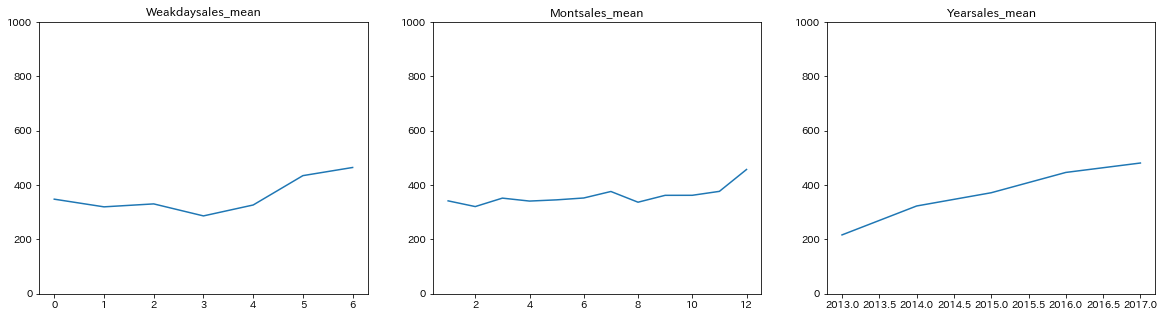

In [48]:
fig ,axes = plt.subplots(1,3, figsize = (20,5))

# 左の領域に平均売上を出力
axes[0].plot(train_Weakday_mean.sales)
# 可視化の設定
axes[0].set_ylim(0,1000) # y軸目盛り
axes[0].set_title('Weakdaysales_mean') # グラフタイトル


# 真ん中の領域に平均売上を出力
axes[1].plot(train_Month_mean.sales)
# 可視化の設定
axes[1].set_ylim(0,1000) # y軸目盛り
axes[1].set_title('Montsales_mean') # グラフタイトル


# 右の領域に平均来店時刻を出力
axes[2].plot(train_Year_mean.sales)
# 可視化の設定
axes[2].set_ylim(0,1000) # y軸目盛り
axes[2].set_title('Yearsales_mean') # グラフタイトル